# HSCI Index Rebal - Introduction

After running the program of HSCI Simulation, we will get two files regarding trade info and backtesting data. <br>

Then, we use this Jupyter Notebook for data visulization <br>

This is part 1 of simulation. Part 2 (Performance Optimzation) will be handled by a seperate Jupyter Notebook<br>

Overall, the result from hindsight seems to have potential to go further with good hit ratio. However, calendar rebalancing may not be optimal due to the relatively large drawdown. So, Part 2 (Performance Optimzation) is essential.

Configuration of HSCI Simulation could be modified in config.conf file. <br>

Aggregated performance is using average approach.

Below are the major parameters used in this example. Also, halted stocks are excluded in performance calculation <br>

"start_year": 2009,               
"end_year": 2020,                 
"begin_business_day":  60,        
"end_business_day": 30,           
"funding_source": "2800 HK Equity"


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import performanceVisualization as pv # custom package

In [2]:
trade_df = pd.read_csv("hsci_trade_file.csv", low_memory=False)
backtest_df = pd.read_csv("hsci_backtest_file.csv", low_memory=False)

for df in [trade_df, backtest_df]:
    for column in df.columns:
        if "date" in column and column != "date_index":
            df[column] = df[column].astype("datetime64[ns]")

In [3]:
trade_df.head()

bbg_ticker  change  count delist_date effective_date  fund_beta  \
0  9633 HK Equity     Add      1         NaT     2020-09-22     0.9810   
1   816 HK Equity  Delete     -1  2020-09-21     2020-09-22     0.9810   
2    35 HK Equity     Add     32         NaT     2020-09-07     0.9807   
3    41 HK Equity     Add     32         NaT     2020-09-07     0.9807   
4   699 HK Equity     Add     32         NaT     2020-09-07     0.9807   

   halt_flag   ipo_date  ipo_return listing_place  ...  review_type  \
0      False 2020-09-08   53.953488            HK  ...      Interim   
1      False        NaT         NaN            HK  ...      Interim   
2      False        NaT         NaN            HK  ...      Regular   
3      False        NaT         NaN            HK  ...      Regular   
4      False        NaT         NaN            HK  ...      Regular   

                      sector stock_beta  stock_code       stock_name  \
0           Consumer Staples        NaN        9633    NONGFU SPRING   
1                  Utilities     0.8244         816    HUADIAN FUXIN   
2  Properties & Construction     0.7959          35  FE CONSORT INTL   
3  Properties & Construction     0.7314          41    GREAT EAGLE H   
4     Consumer Discretionary     0.8061         699          CAR INC   

  stock_name_chinese trade_end_date trade_id  trade_start_date  year  
0               農夫山泉     2020-10-12        0        2020-09-08  2020  
1               華電福新     2020-09-21        1        2020-06-30  2020  
2               遠東發展     2020-10-12        2        2020-06-15  2020  
3                 鷹君     2020-10-12        3        2020-06-15  2020  
4               神州租車     2020-10-12        4        2020-06-15  2020  

[5 rows x 21 columns]

In [4]:
backtest_df.head()

bbg_ticker  daily_fund_return  daily_stock_return       date  \
0  9633 HK Equity           0.000000            0.000000 2020-09-08   
1  9633 HK Equity          -0.551615            0.302115 2020-09-09   
2  9633 HK Equity          -0.396197            8.132530 2020-09-10   
3  9633 HK Equity           0.477327           -2.506964 2020-09-11   
4  9633 HK Equity           0.554236            3.285714 2020-09-14   

   date_index effective_date  fund_return  long_short_return  \
0         -10     2020-09-22     0.000000           0.000000   
1          -9     2020-09-22    -0.551615           0.853730   
2          -8     2020-09-22    -0.945626           9.404841   
3          -7     2020-09-22    -0.472813           6.212995   
4          -6     2020-09-22     0.078802           9.135699   

   roll_abs_drawdown  roll_ls_drawdown  stock_return  trade_id  
0           0.000000          0.000000      0.000000         0  
1           0.000000          0.000000      0.302115         0  
2           0.000000          0.000000      8.459215         0  
3          -2.719033         -3.191846      5.740181         0  
4           0.000000         -0.269142      9.214502         0

# Summary

### Count Summary

Most of the rebalanace cases are coming from Regular Index Review which held on March and September each year. <br>

Add is far more than Delete in Regular Review, while Delete is the majority in Interim Review <br>

1/3 of stocks in Interim Deletion are halted and 2/3 of them will be delisted within the period <br>

IPO means the stocks was inactive in the original trade start date. So, it could be IPO or resume trading after being halted. These cases would have 0 IPO return, so I flaged it out.

1/2 of stocks in Interim Addition are IPO. Most of the cases are large stocks which had fast entry premit to the index.

In [5]:
count_summary = pv.get_count_summary(trade_df=trade_df)
count_summary

trade_id  halt_flag  delist  ipo  zero_ipo_return
review_type change                                                   
Interim     Add           30          0       0   18                2
            Delete        68         22      44    5                4
Name Change Add            2          0       0    0                0
            Delete         2          0       0    0                0
Regular     Add          738          7       9   55               11
            Delete       416          9      14    7                4

# Chart Visualization

### Regular Add

Addition Stocks in Regular HSCI Review tends to outperform our funding source (2800 HK Equity) (HSI) <br>

Outperformance tends to happens from ~25 business day before effective date until ~10 business day after effective date. <br>

Trends are similar no matter breaking down by year-month, year or month although some outliers exist <br>

A hindsight summary will be generated based on manual input. <br>

I picked -25D to +10D for the hindsight summary. Below are some key notes:
1. Average Return per Year-Month is 4.33%
2. Hit Ratio based on Year-Month is 75% (75% of Year-Month were winning) 
3. Average Year-Month Max Drawdown is -5.79%
4. Average Stock Count is 30

Per Trade Analysis
1. Hit Ratio per trade is just 53%. Nearly 2 Win Loss Ratio is high, indicating that positive gain is significantly higher than negative loss.
2. Gap between Mean and Median Return means there may have large outliers which scale up the return. Same indication as Win Loss Ratio
3. Max Drawdown is huge here because it's taking the average Max Drawdown of each trade. Max Drawdown date could be different for each trade. However, it's still a huge drawdown.

Parameters' optimization will be discussed in the Part 2


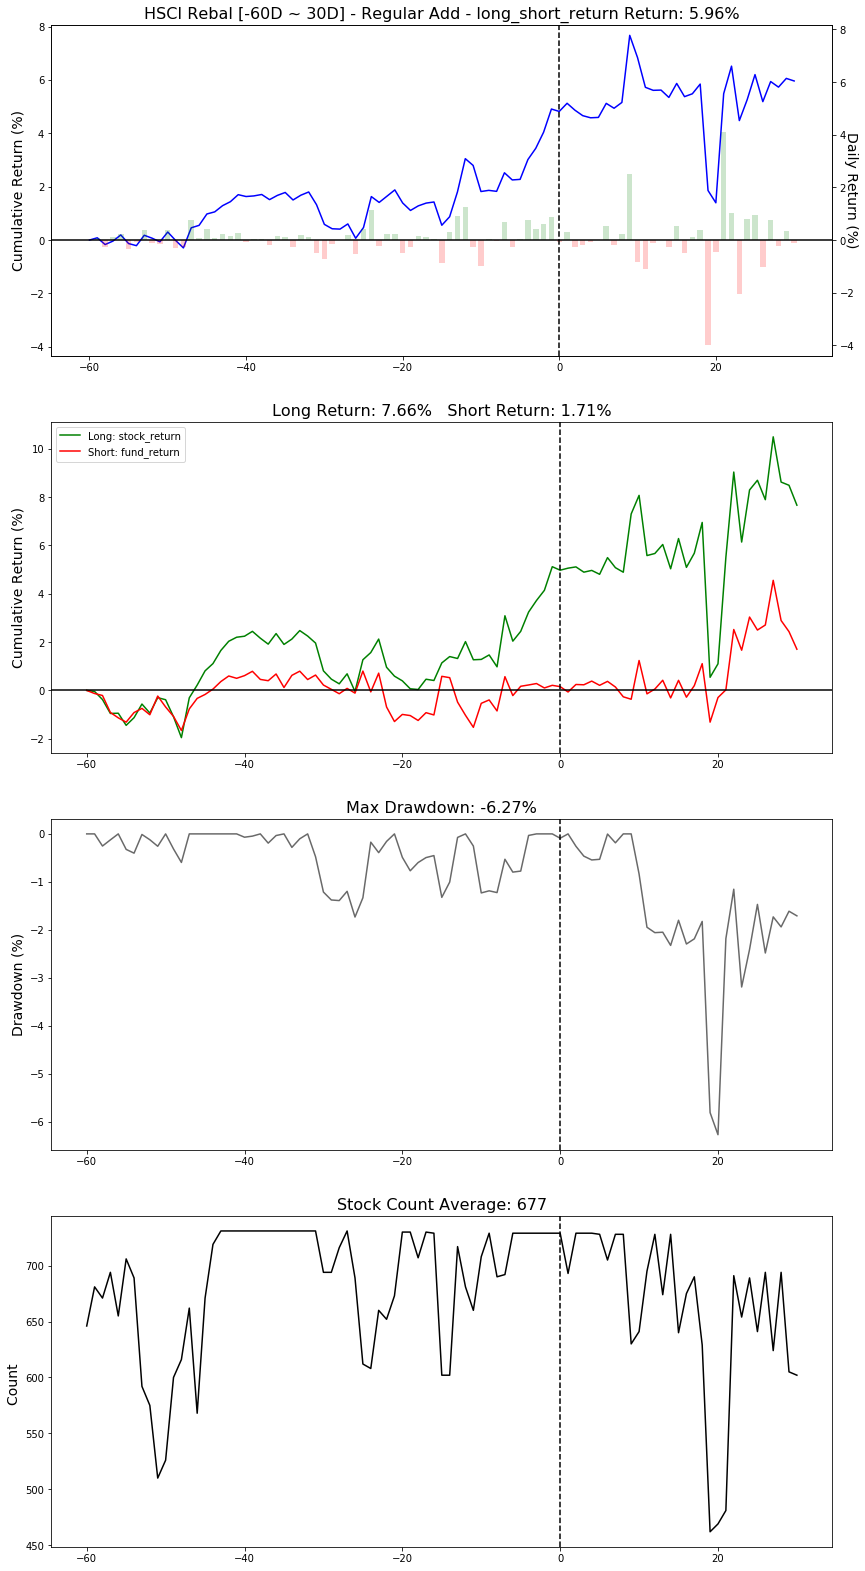

In [6]:
regular_add_chart = pv.get_aggregate_performance_chart(backtest_df, trade_df, review_type="Regular", change="Add")

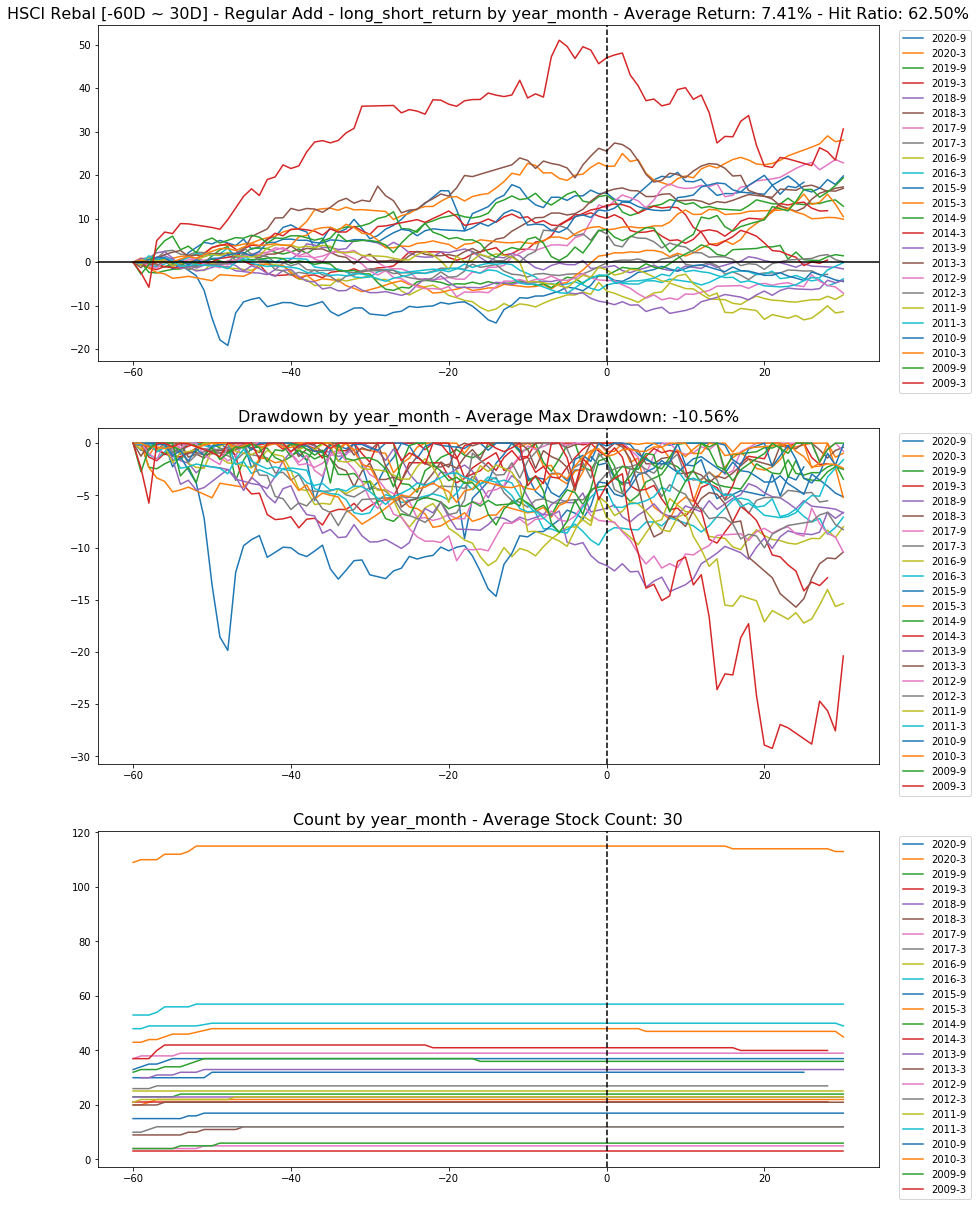

In [7]:
regular_add_chart_year_month = pv.get_group_performance_chart(backtest_df, trade_df, 
                                                           review_type="Regular", change="Add", 
                                                           group_by="year_month")

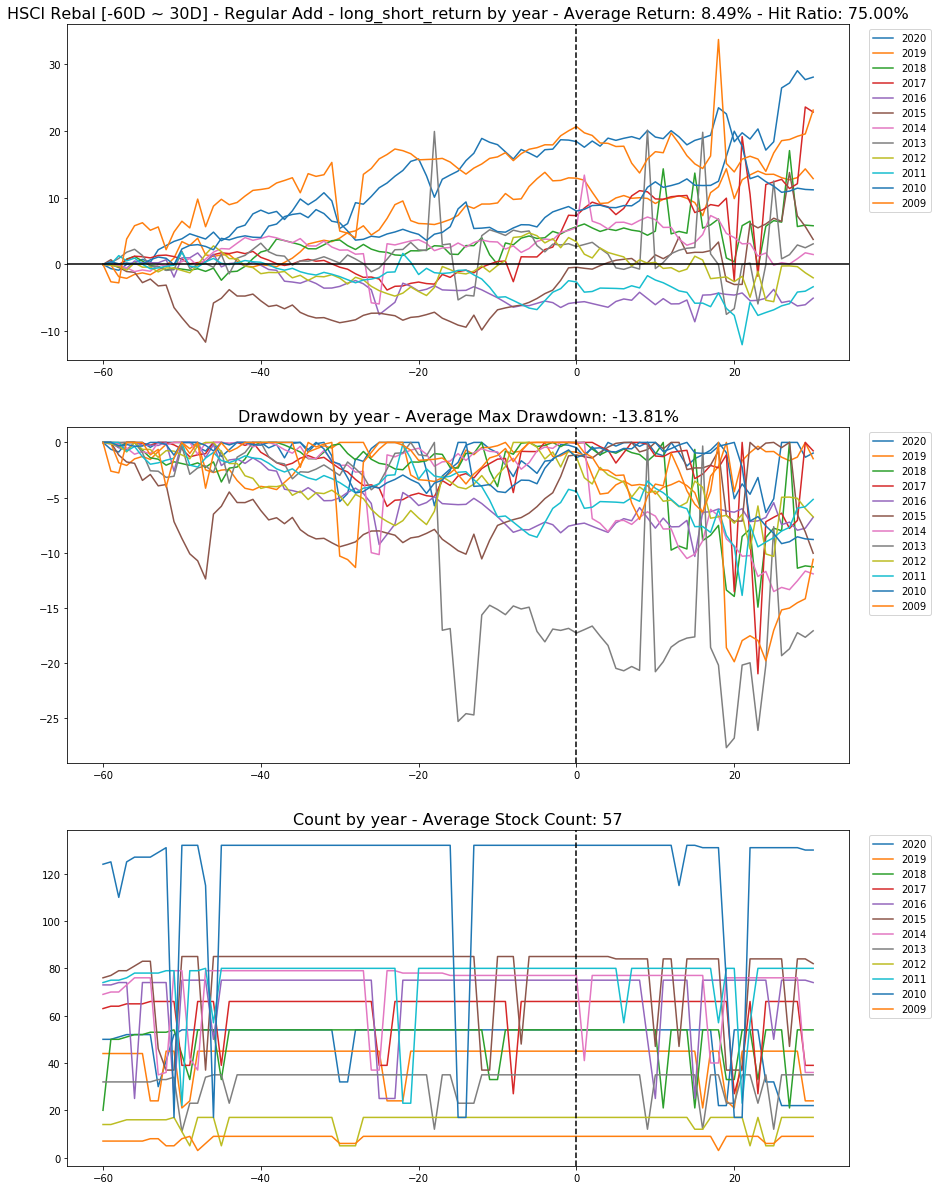

In [8]:
regular_add_chart_year = pv.get_group_performance_chart(backtest_df, trade_df, 
                                                     review_type="Regular", change="Add", 
                                                     group_by="year")

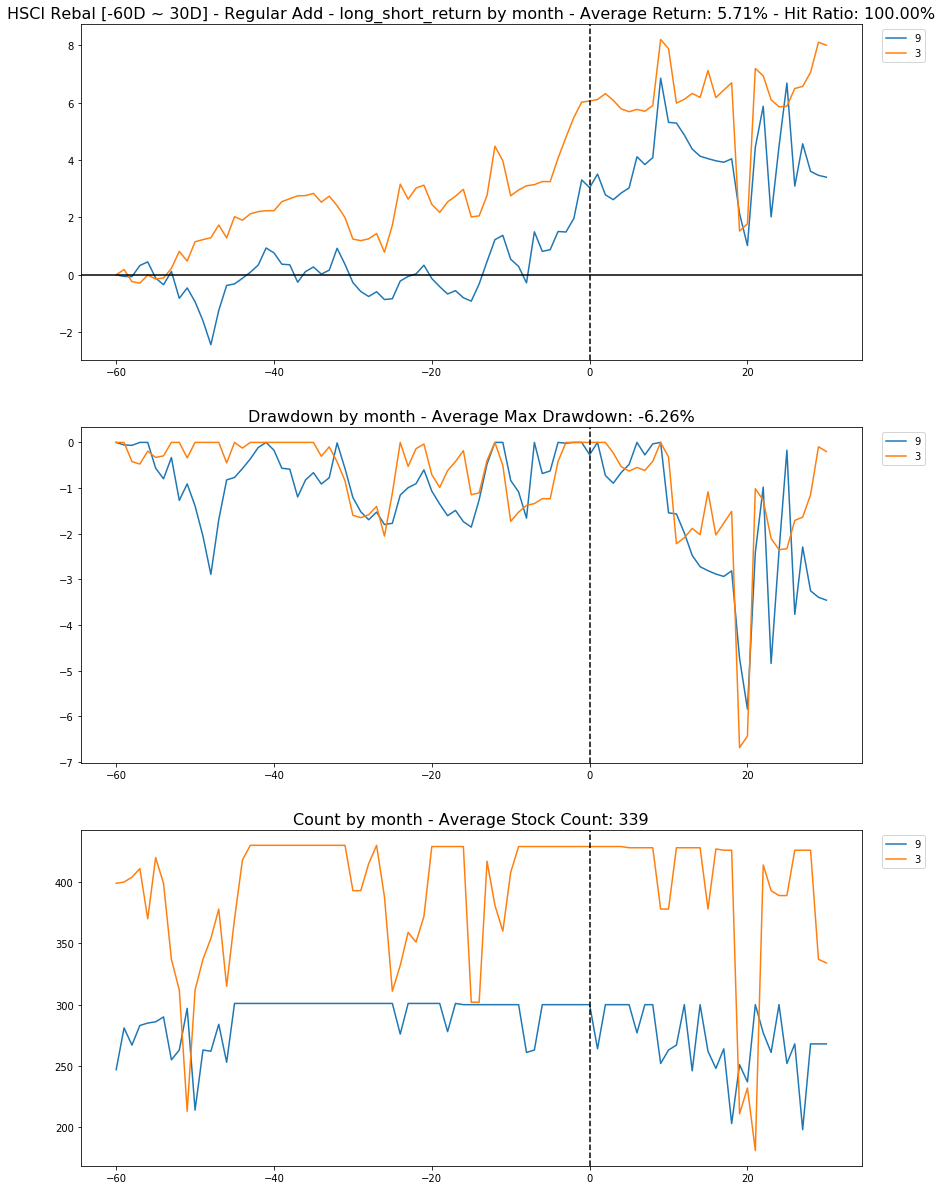

In [9]:
regular_add_chart_month = pv.get_group_performance_chart(backtest_df, trade_df, 
                                                     review_type="Regular", change="Add", 
                                                      group_by="month")

#### Hindsight Backtest (Regular Add)

In [10]:
hindsight_regular_add_backtest_df = pv.get_hindsight_backtest_df(backtest_df, trade_df, 
                                                              review_type="Regular", change="Add", 
                                                              begin_business_day=25, end_business_day=10)

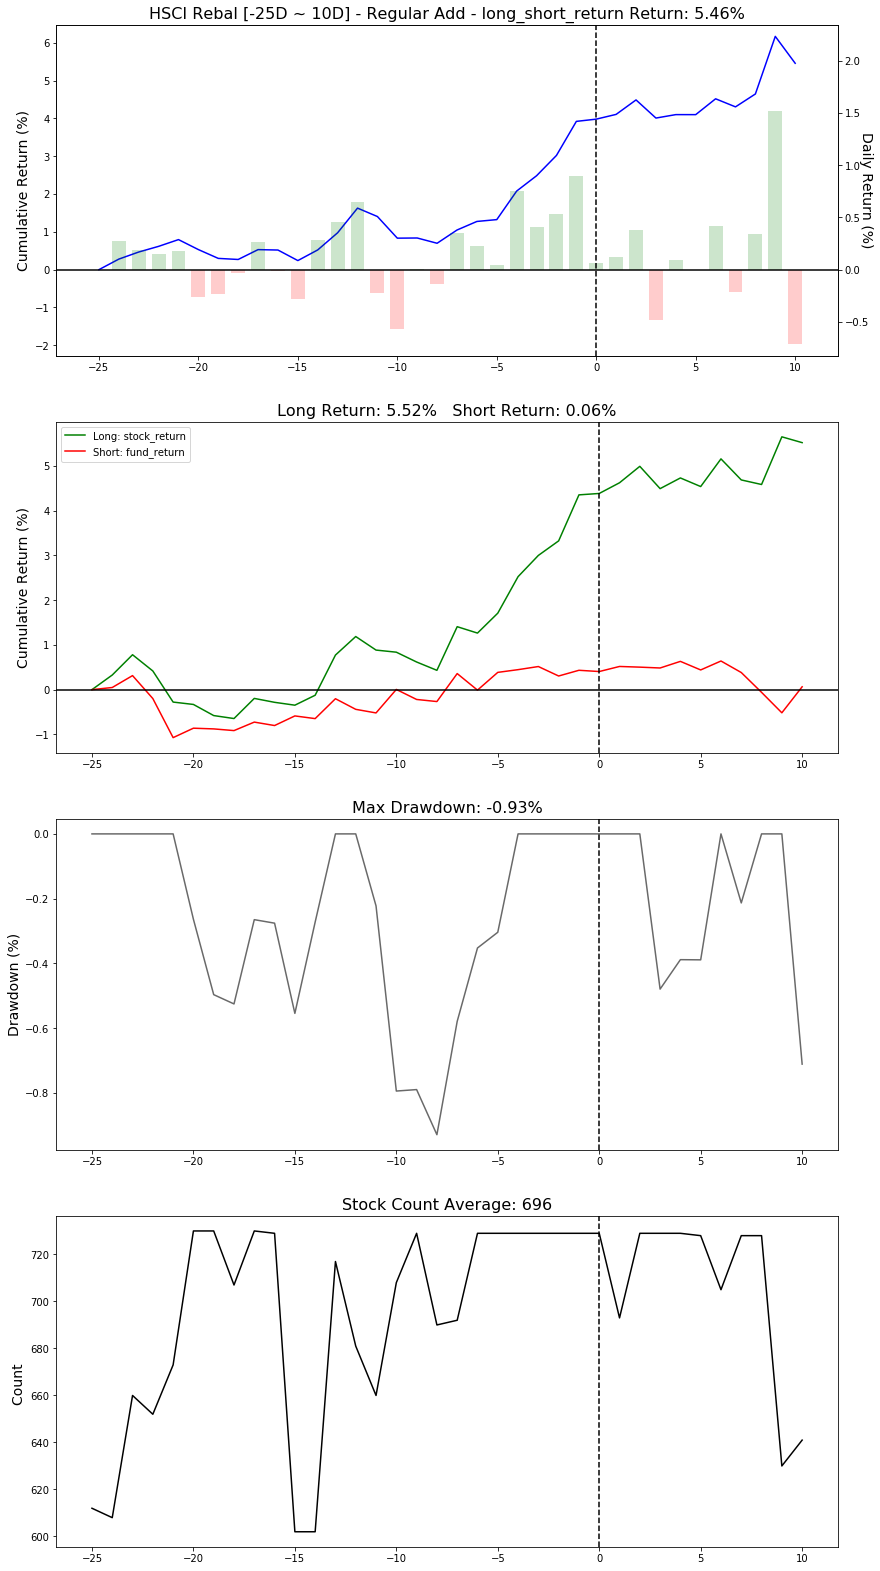

In [11]:
hindsight_regular_add_chart = pv.get_aggregate_performance_chart(hindsight_regular_add_backtest_df, 
                                                                 trade_df, review_type="Regular", change="Add")

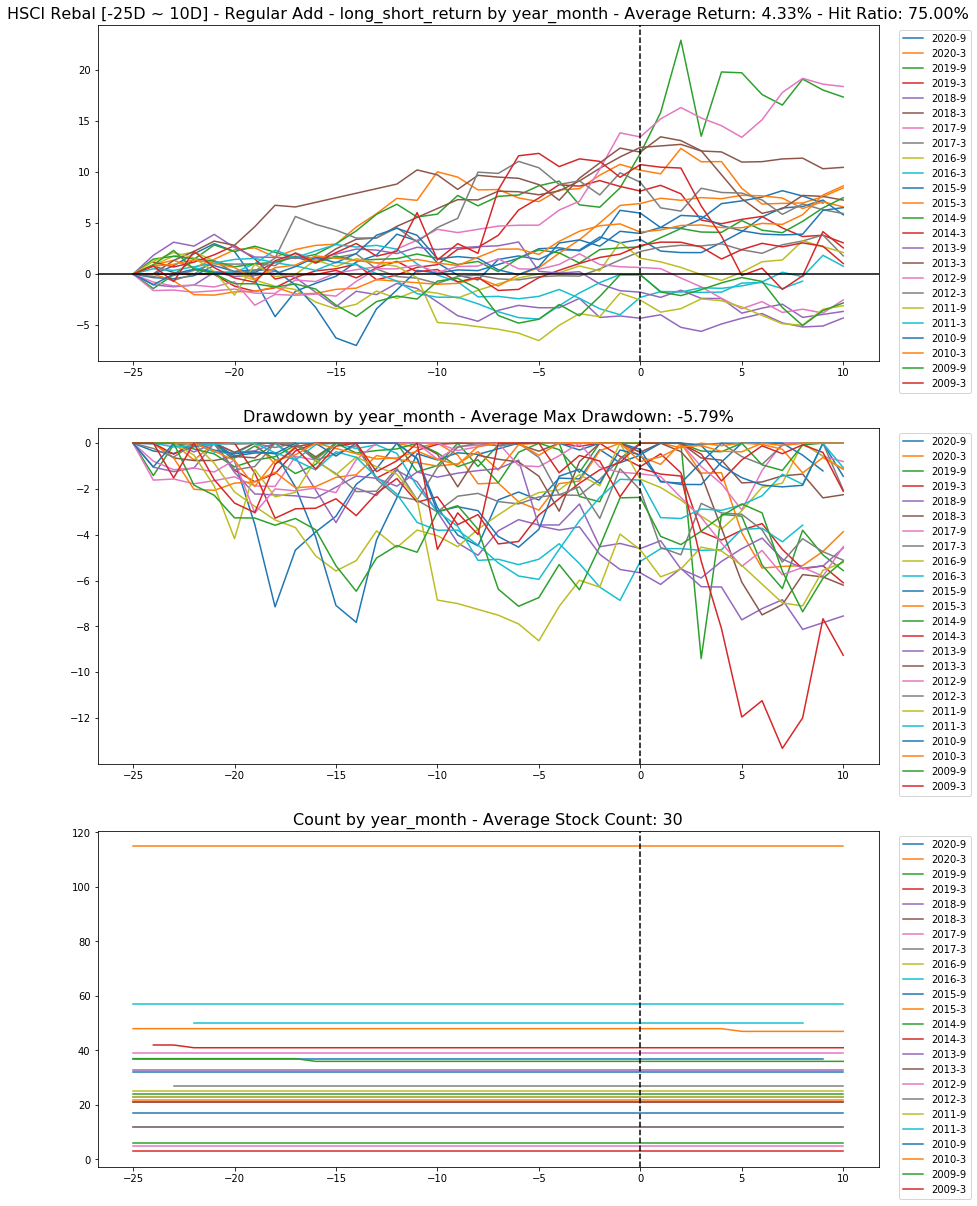

In [12]:
hindsight_regular_add_chart_year_month = pv.get_group_performance_chart(hindsight_regular_add_backtest_df, 
                                                                        trade_df, 
                                                                        review_type="Regular", change="Add", 
                                                                        group_by="year_month")

In [13]:
hindsight_regular_add_trade_summary = pv.get_trade_summary(hindsight_regular_add_backtest_df, trade_df)
hindsight_regular_add_trade_summary.T.rename(columns={0: "All Trade"})

All Trade
mean_return                   5.06
mean_trade_max_drawdown     -14.76
mean_sharpe_ratio             0.97
mean_win_loss_ratio           1.89
hit_ratio                    53.90
median_return                 1.16
median_max_drawdown         -12.00
median_sharpe_ratio           0.23
median_win_loss_ratio         1.57
trade_count                 731.00

In [14]:
hindsight_regular_add_trade_summary_year_month = pv.get_group_trade_summary(hindsight_regular_add_backtest_df, 
                                                                         trade_df, group_by="year_month")
hindsight_regular_add_trade_summary_year_month

mean  median  2020-9  2020-3  2019-9  2019-3  \
mean_return               4.30    4.30    5.81    8.44   17.34    3.06   
mean_trade_max_drawdown -15.44  -15.54  -19.32  -17.76  -23.63  -16.84   
mean_sharpe_ratio         0.91    0.88    0.88    1.56    2.48    0.55   
mean_win_loss_ratio       1.96    1.57    1.65    1.72    7.76    2.03   
hit_ratio                51.60   51.35   56.25   63.64   50.00   42.86   
median_return             0.54    0.54    0.82    8.05   -0.20   -4.26   
median_max_drawdown     -13.22  -12.99  -15.52  -16.71  -12.13  -14.70   
median_sharpe_ratio       0.22    0.12    0.12    1.45   -0.03   -0.61   
median_win_loss_ratio     1.75    1.56    2.46    1.50    5.11    1.84   
trade_count              30.46   25.00   32.00   22.00   24.00   21.00   

                         2018-9  2018-3  2017-9  2017-3  ...  2013-9  2013-3  \
mean_return               -4.30   10.46   18.37    1.79  ...   -3.66    7.25   
mean_trade_max_drawdown  -17.56  -10.69  -16.74  -11.54  ...  -15.64  -11.95   
mean_sharpe_ratio         -0.64    2.75    4.17    0.45  ...   -0.69    1.82   
mean_win_loss_ratio        0.98    2.31    3.17    1.57  ...    1.43    1.45   
hit_ratio                 27.27   80.95   61.54   48.15  ...   21.74   66.67   
median_return             -4.69    6.58    4.88   -2.23  ...   -4.61    8.23   
median_max_drawdown      -14.67   -9.34   -9.77   -9.62  ...  -14.23  -11.90   
median_sharpe_ratio       -0.73    1.65    1.07   -0.62  ...   -0.89    2.13   
median_win_loss_ratio      0.87    1.32    3.97    0.75  ...    1.82    1.37   
trade_count               33.00   21.00   39.00   27.00  ...   23.00   12.00   

                         2012-9  2012-3  2011-9  2011-3  2010-9  2010-3  \
mean_return               -2.53    5.93   -3.10    0.77    6.51    8.64   
mean_trade_max_drawdown  -10.26  -15.34  -18.44  -13.38  -12.01  -10.23   
mean_sharpe_ratio         -0.68    1.09   -0.44    0.16    1.48    2.24   
mean_win_loss_ratio        0.45    1.32    1.49    1.42    2.41    2.26   
hit_ratio                 40.00   66.67   30.43   45.61   52.94   74.78   
median_return             -1.77    6.80   -8.94   -0.97    2.02    5.71   
median_max_drawdown       -9.54  -12.95  -16.41  -12.06  -10.68   -8.88   
median_sharpe_ratio       -0.48    1.58   -1.11   -0.20    0.42    1.40   
median_win_loss_ratio      0.64    2.40    1.24    1.13    1.94    1.83   
trade_count                5.00   12.00   23.00   57.00   17.00  115.00   

                         2009-9  2009-3  
mean_return               -2.82    2.56  
mean_trade_max_drawdown  -18.18  -19.80  
mean_sharpe_ratio         -0.42    0.37  
mean_win_loss_ratio        1.40    1.56  
hit_ratio                 33.33   66.67  
median_return             -7.67    2.16  
median_max_drawdown      -16.37  -20.59  
median_sharpe_ratio       -0.96    0.30  
median_win_loss_ratio      1.65    1.56  
trade_count                6.00    3.00  

[10 rows x 26 columns]

### Regular Delete

Deletion Stocks in Regular HSCI Review tends to underperform our funding source (2800 HK Equity) (HSI) <br>

Underperformance tends to since from ~40 business day. The underperformance trend could last long after effective date <br>

it's different with some other indices, it seems there has no bounce back after the stocks have been deleted from HSCI. <br>

Trends are similar no matter breaking down by year-month, year or month although some outliers exist <br>

A hindsight summary will be generated based on manual input. <br>

I picked -10D to +25D for the hindsight summary because -40D seems a bit early. Below are some key notes:
1. The side is fliped. Long our previous funding source, Short deletion stocks.
2. Average Return per Year-Month is 3.84% and the trend seems continue even after 25D
2. Hit Ratio based on Year-Month is 70.83% (70% of Year-Month were winning) 
3. Average Year-Month Max Drawdown is -5.45%
4. Average Stock Count is 17, which is lower than addition

Per Trade Analysis
1. Hit Ratio per trade is just 63% with normal Win Loss Ratio (around 1), which seems good.
2. No Gap between Mean and Median Return.
3. Similar to Regular Add, Max Drawdown is huge. However, it's a bit lower than Regular Add.

Parameters' optimization will be discussed in the Part 2 (Performance Optimization)


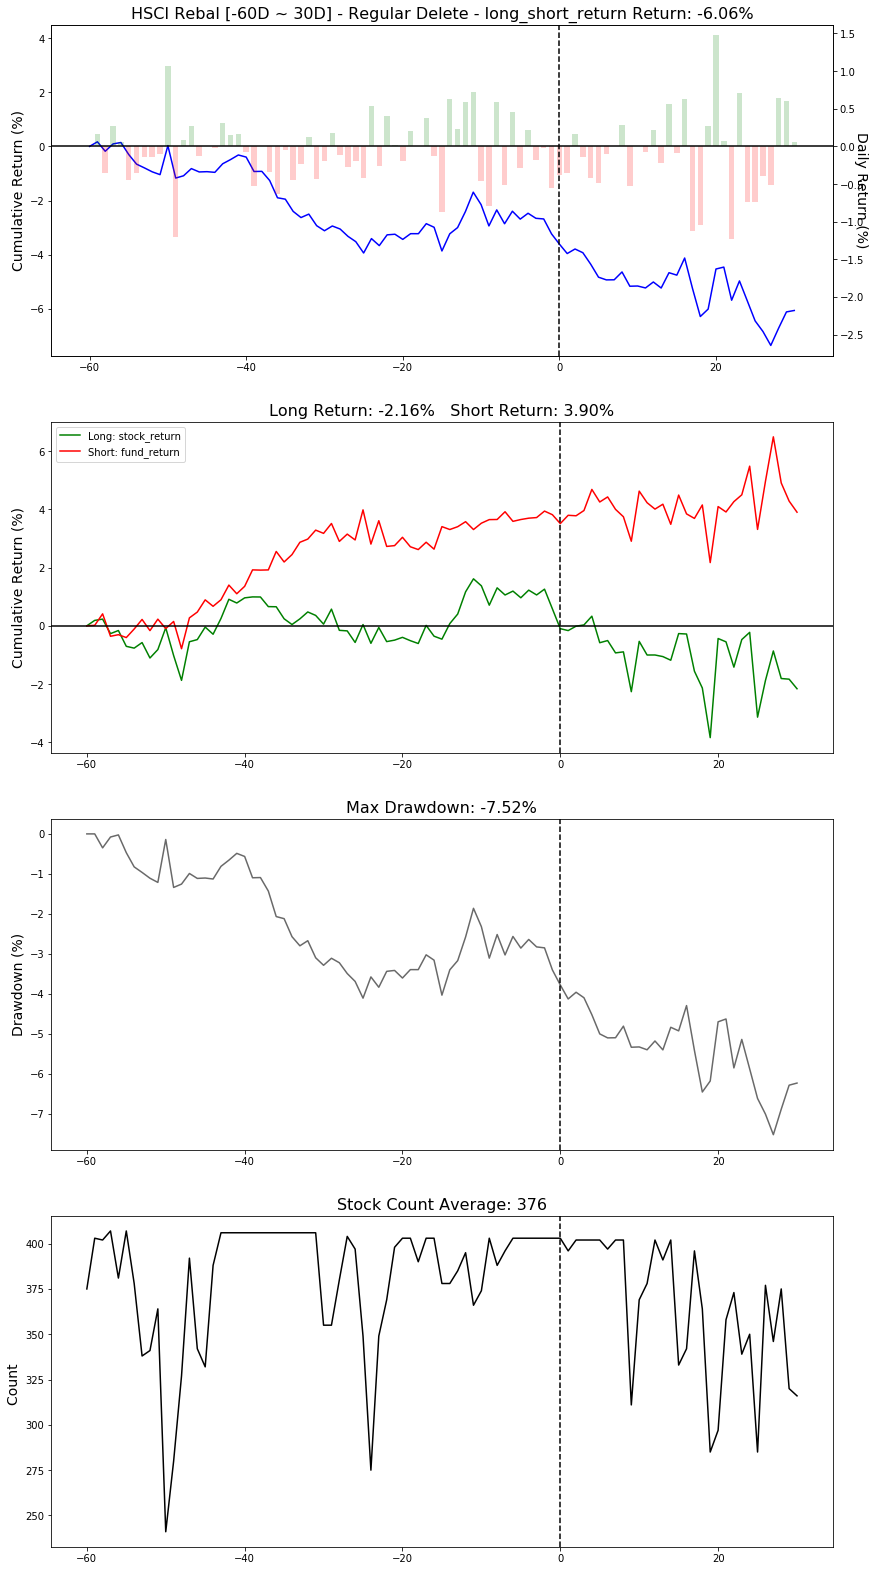

In [15]:
regular_delete_chart = pv.get_aggregate_performance_chart(backtest_df, trade_df, 
                                                          review_type="Regular", change="Delete")

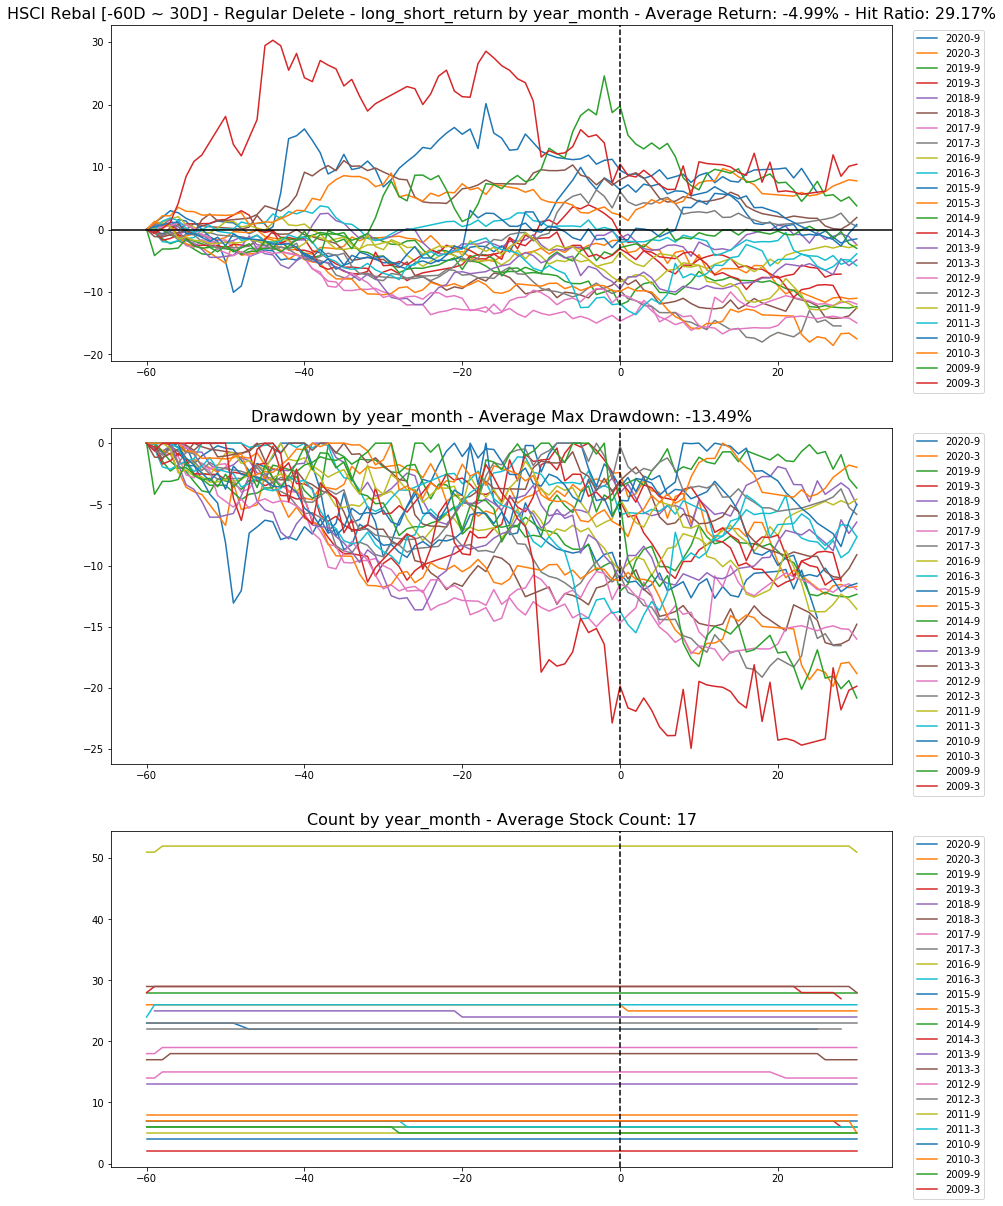

In [16]:
regular_delete_chart_year_month = pv.get_group_performance_chart(backtest_df, trade_df, 
                                                              review_type="Regular", change="Delete", 
                                                                 group_by="year_month")


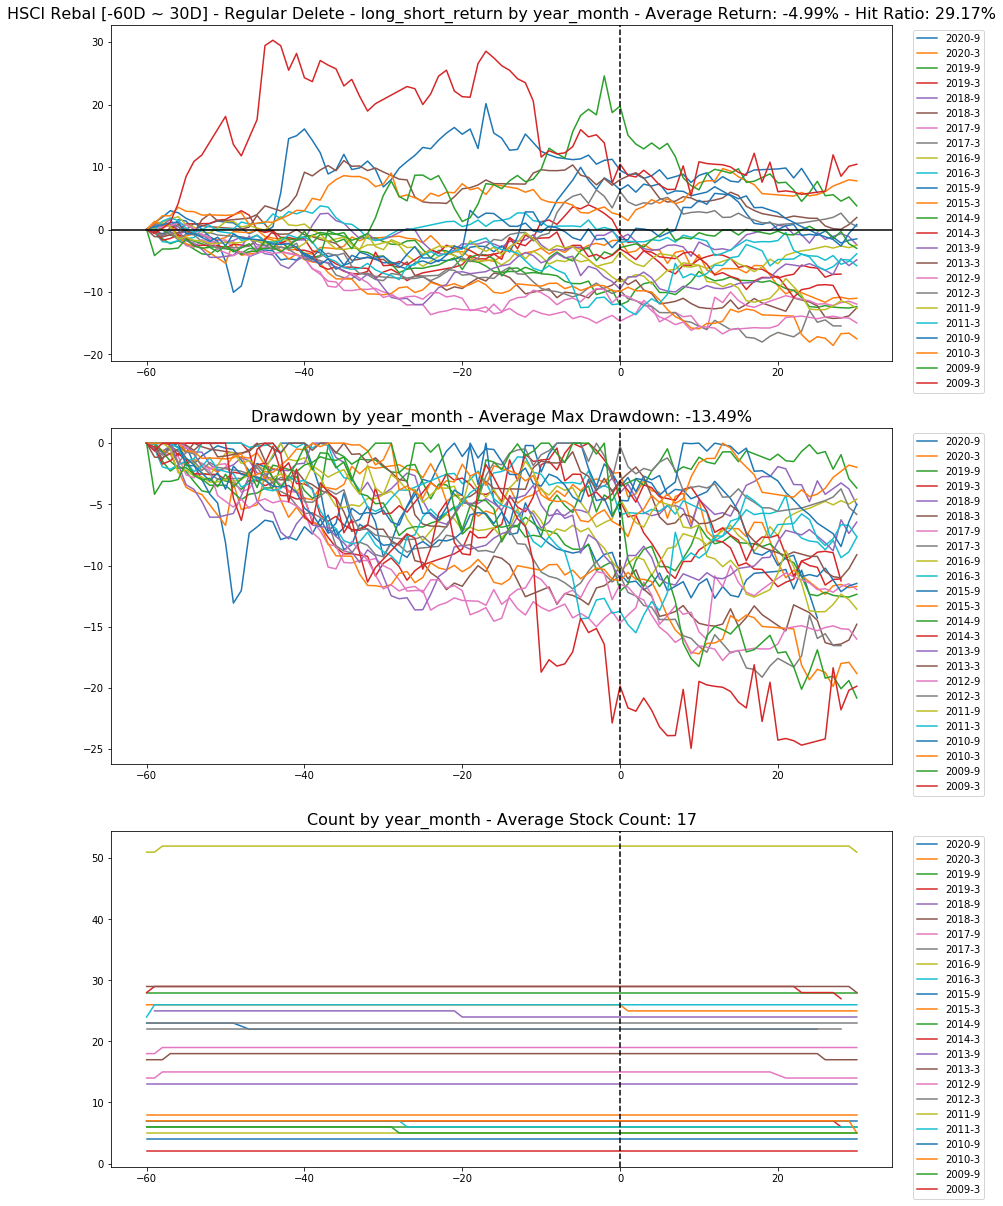

In [17]:
regular_delete_chart_year_month = pv.get_group_performance_chart(backtest_df, trade_df, 
                                                           review_type="Regular", change="Delete", 
                                                           group_by="year_month")

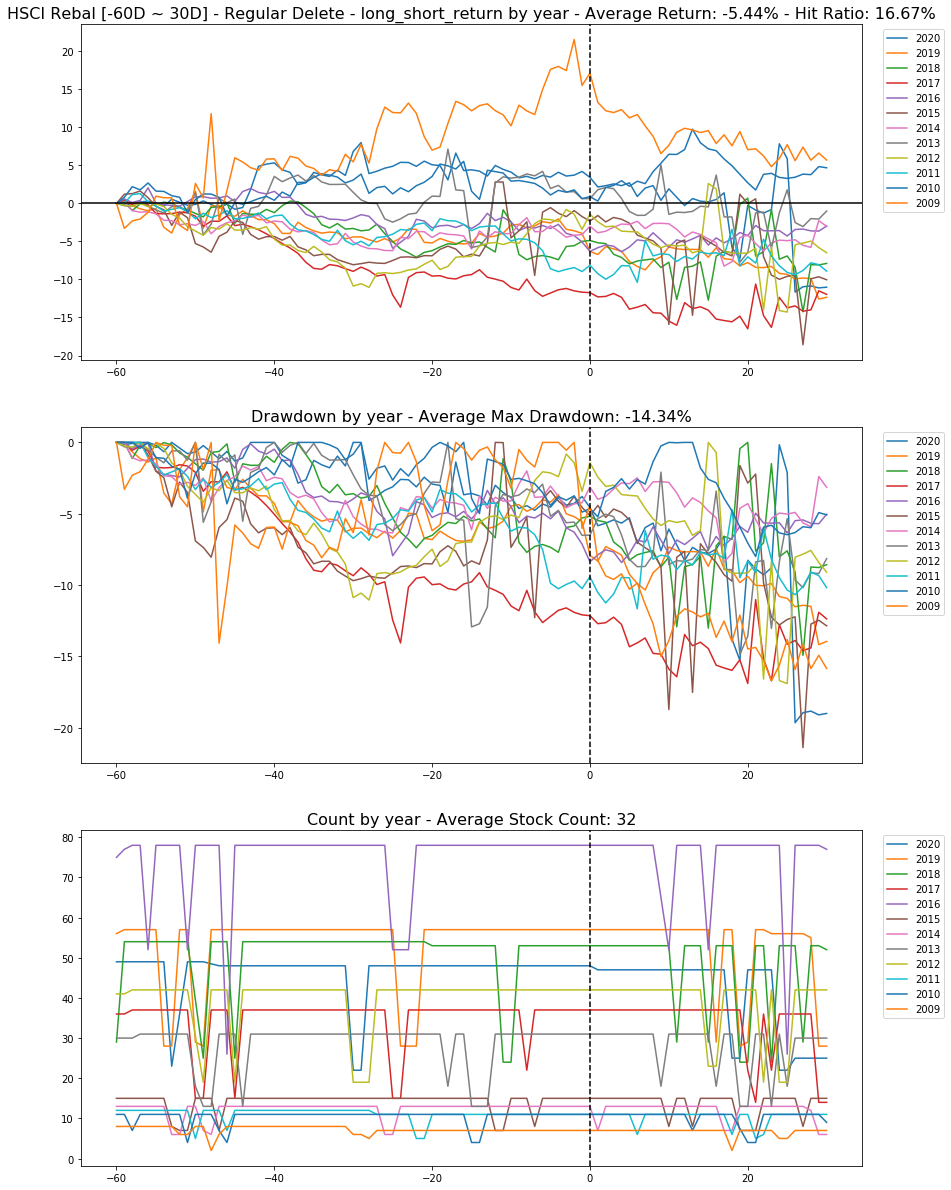

In [18]:
regular_delete_chart_year = pv.get_group_performance_chart(backtest_df, trade_df, 
                                                        review_type="Regular", change="Delete", 
                                                        group_by="year")

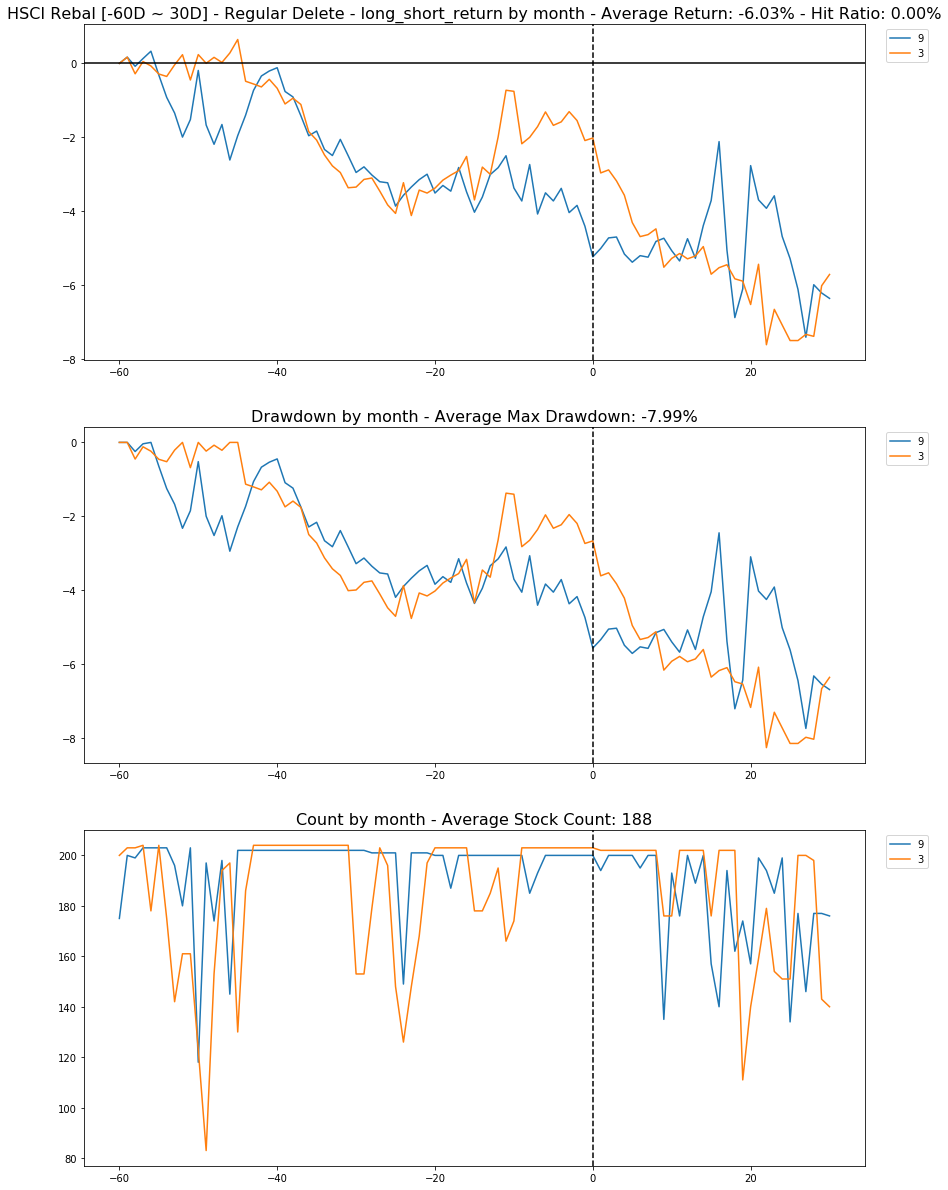

In [19]:
regular_delete_chart_month = pv.get_group_performance_chart(backtest_df, trade_df, 
                                                         review_type="Regular", change="Delete", 
                                                         group_by="month")

#### Hindsight Backtest (Regular Delete)

In [20]:
hindsight_regular_delete_backtest_df = pv.get_hindsight_backtest_df(backtest_df, trade_df, 
                                                                 review_type="Regular", change="Delete", 
                                                                 begin_business_day=10, end_business_day=25, 
                                                                 flip_side=True)

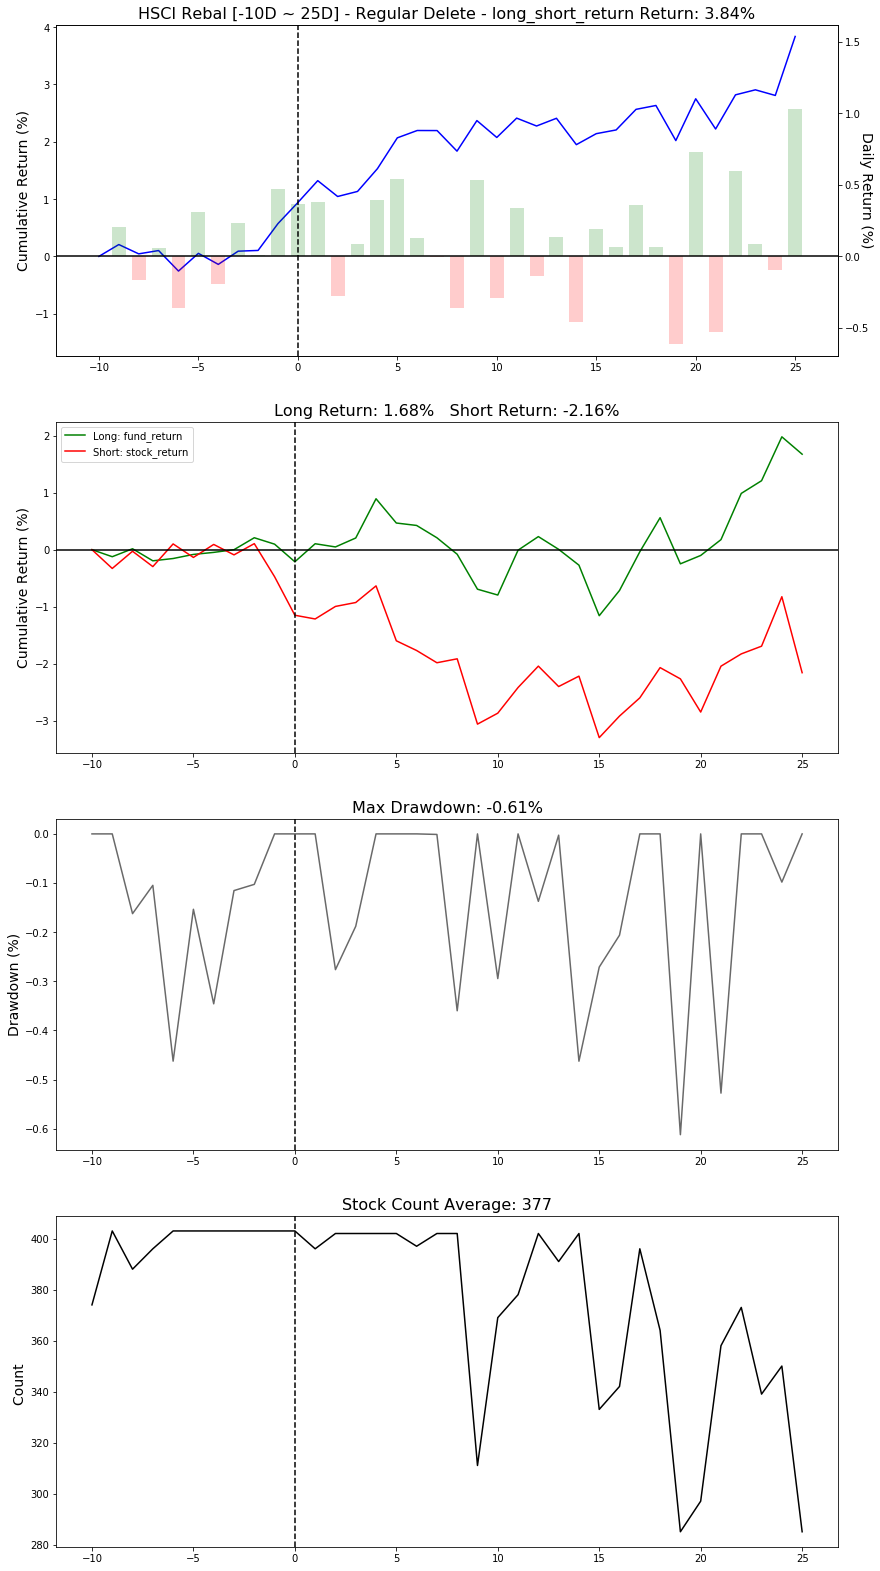

In [21]:
hindsight_regular_delete_chart = pv.get_aggregate_performance_chart(hindsight_regular_delete_backtest_df, 
                                                                 trade_df, review_type="Regular", change="Delete", 
                                                                 flip_side=True)

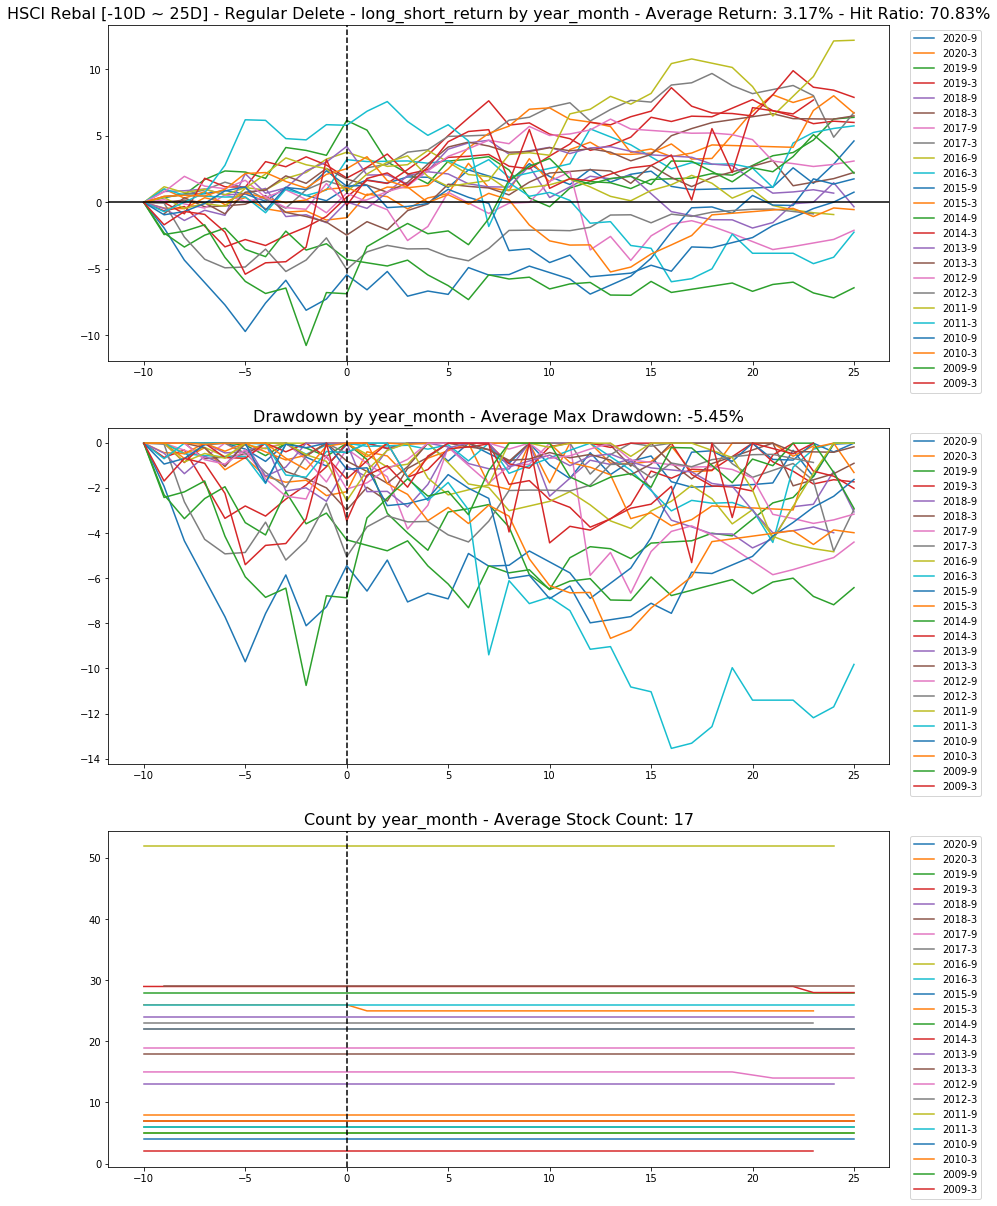

In [22]:
hindsight_regular_delete_chart_year_month = pv.get_group_performance_chart(hindsight_regular_delete_backtest_df, 
                                                                        trade_df, 
                                                                        review_type="Regular", change="Delete", 
                                                                        group_by="year_month")

In [23]:
hindsight_regular_delete_trade_summary = pv.get_trade_summary(hindsight_regular_delete_backtest_df, trade_df)
hindsight_regular_delete_trade_summary.T.rename(columns={0: "All Trade"})

All Trade
mean_return                   3.18
mean_trade_max_drawdown     -13.71
mean_sharpe_ratio             0.62
mean_win_loss_ratio           0.89
hit_ratio                    67.00
median_return                 4.27
median_max_drawdown          -9.51
median_sharpe_ratio           1.02
median_win_loss_ratio         1.39
trade_count                 403.00

In [24]:
hindsight_regular_delete_trade_summary_year_month = pv.get_group_trade_summary(hindsight_regular_delete_backtest_df, 
                                                                         trade_df, group_by="year_month")
hindsight_regular_delete_trade_summary_year_month

mean  median  2020-9  2020-3  2019-9  2019-3  \
mean_return               3.23    3.12    4.62    7.42    6.40    6.19   
mean_trade_max_drawdown -13.20  -12.83  -16.02  -13.51  -16.45  -12.60   
mean_sharpe_ratio         0.79    0.69    0.87    1.58    1.16    1.39   
mean_win_loss_ratio       1.45    0.99    3.12    2.85    1.67    1.02   
hit_ratio                66.44   65.38   59.09   65.38   64.29   75.86   
median_return             3.92    3.53    1.63    3.36    2.90    7.45   
median_max_drawdown     -10.01   -9.68  -12.53  -10.96  -11.49   -9.04   
median_sharpe_ratio       1.02    0.87    0.29    0.67    0.66    2.45   
median_win_loss_ratio     1.62    1.15    3.44    2.31    1.66    2.41   
trade_count              16.79   16.79   22.00   26.00   28.00   29.00   

                         2018-9  2018-3  2017-9  2017-3  ...  2013-9  2013-3  \
mean_return               -0.32    2.26   -0.19    6.76  ...    0.70    6.51   
mean_trade_max_drawdown  -15.23  -11.70  -17.98  -11.81  ...  -12.14   -8.47   
mean_sharpe_ratio         -0.06    0.45   -0.03    1.53  ...    0.14    1.67   
mean_win_loss_ratio        0.31    0.72    0.65    0.61  ...    0.99    2.86   
hit_ratio                 75.00   68.97   60.00   86.36  ...   53.85   66.67   
median_return              2.79    3.18    4.05    5.81  ...    3.46    5.73   
median_max_drawdown       -9.45   -9.36   -7.27   -7.81  ...   -8.52   -6.79   
median_sharpe_ratio        0.59    0.75    1.23    1.69  ...    0.87    1.75   
median_win_loss_ratio      0.47    1.56    2.49    0.42  ...    2.76    3.07   
trade_count               24.00   29.00   15.00   22.00  ...   13.00   18.00   

                         2012-9  2012-3  2011-9  2011-3  2010-9  2010-3  \
mean_return                3.12   -0.86   12.20   -2.23    0.77   -0.54   
mean_trade_max_drawdown  -11.66  -14.40   -8.25  -21.01  -12.14  -12.19   
mean_sharpe_ratio          0.69   -0.15    3.97   -0.31    0.20   -0.13   
mean_win_loss_ratio        1.06    0.75    7.52    0.31    1.15    0.64   
hit_ratio                 63.16   52.17   80.00   66.67   50.00   57.14   
median_return              6.34    0.65   10.73    3.71    0.50    2.48   
median_max_drawdown       -8.86  -11.92   -6.95  -16.36   -9.68  -11.89   
median_sharpe_ratio        1.76    0.13    3.07    0.87    0.12    0.70   
median_win_loss_ratio      0.80    1.00    5.83    0.33    1.15    0.69   
trade_count               19.00   23.00    5.00    6.00    4.00    7.00   

                         2009-9  2009-3  
mean_return                2.20    7.70  
mean_trade_max_drawdown  -13.71  -13.21  
mean_sharpe_ratio          0.41    1.39  
mean_win_loss_ratio        0.39     NaN  
hit_ratio                 80.00  100.00  
median_return              1.87    7.70  
median_max_drawdown      -11.70  -13.21  
median_sharpe_ratio        0.38    1.39  
median_win_loss_ratio      0.37     NaN  
trade_count                5.00    2.00  

[10 rows x 26 columns]

### Interim Add IPO

Interim Add with IPO is an interesting topic. The chart may be ugly as the numbers of stocks are not consitant in each date_index <br>

This performance is exlcuding the IPO return <br>

An Interesting fact is that the stocks which listed ~10 days before effective date tends to generate positive return even after IPO Date, although only ~15 cases in total.

A hindsight summary will be generated based on manual input. <br>

I picked -10D to 0D for the hindsight summary. Below are some key points.
1. Although the aggregate picture looks good with 5.28% return, it gets ugly when we break down by year_month
2. Average Return per Year-Month will be 4% with 60% Hit Ratio.
3. Average Max Drawdown is nearly 6% with some outliers
4. Number of cases is not enough.

Per Trade Analysis
1. No clear pattern between ipo return and stock return before effective date

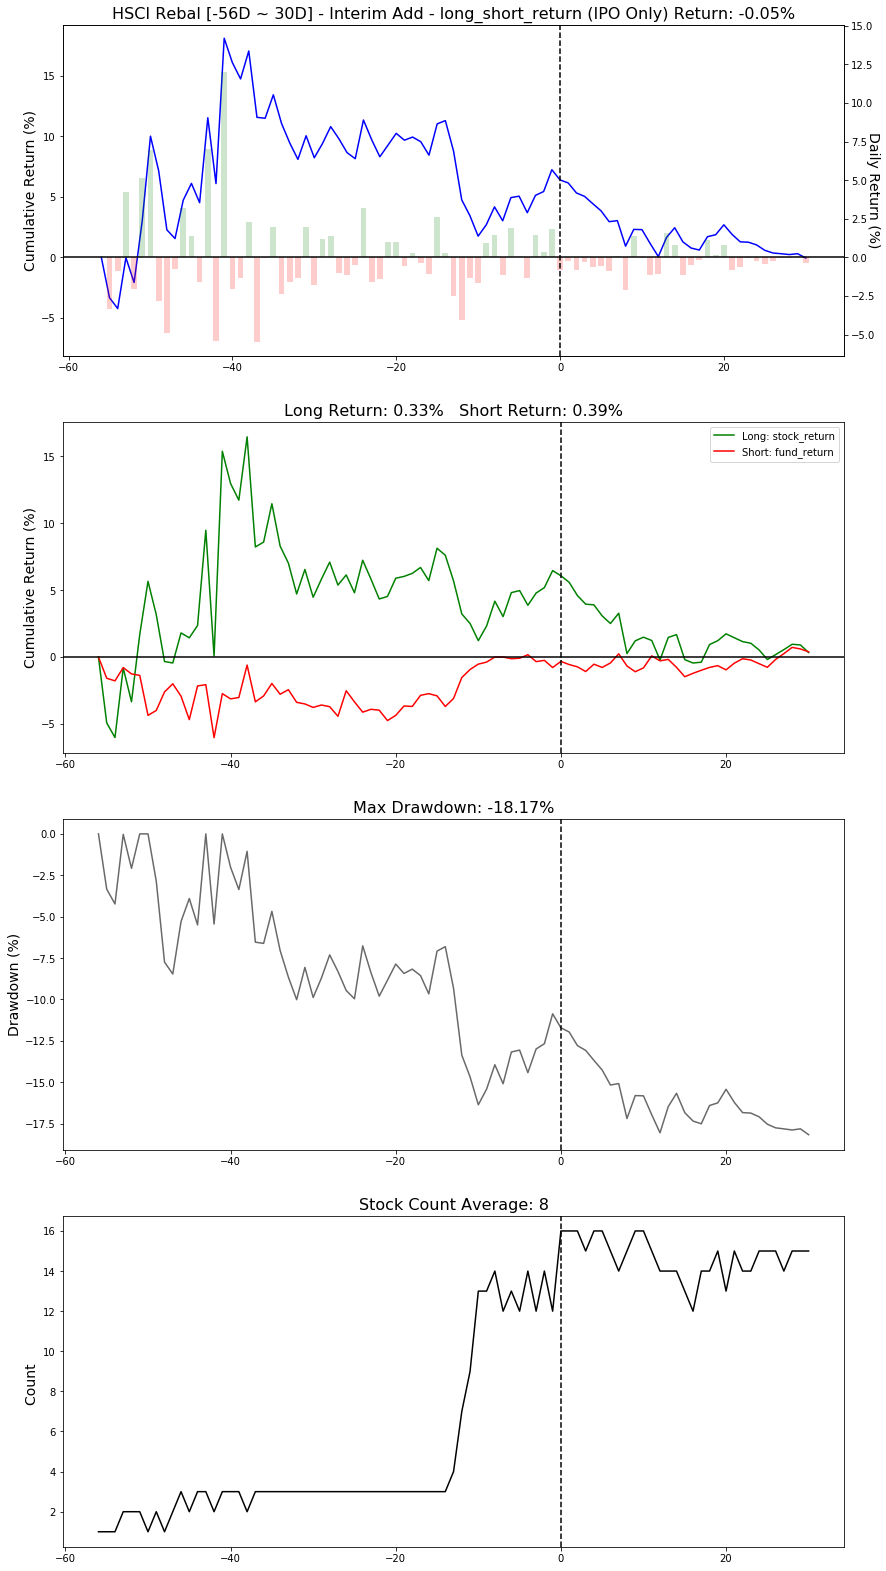

In [25]:
interim_add_ipo_chart = pv.get_aggregate_performance_chart(backtest_df, trade_df, 
                                                           review_type="Interim", change="Add", ipo_only=True)


#### Hindsight Backtest (Interim Add IPO)

In [26]:
hindsight_interim_add_ipo_backtest_df = pv.get_hindsight_backtest_df(backtest_df, trade_df, 
                                                                 review_type="Interim", change="Add", 
                                                                 begin_business_day=10, end_business_day=0, 
                                                                 ipo_only=True)

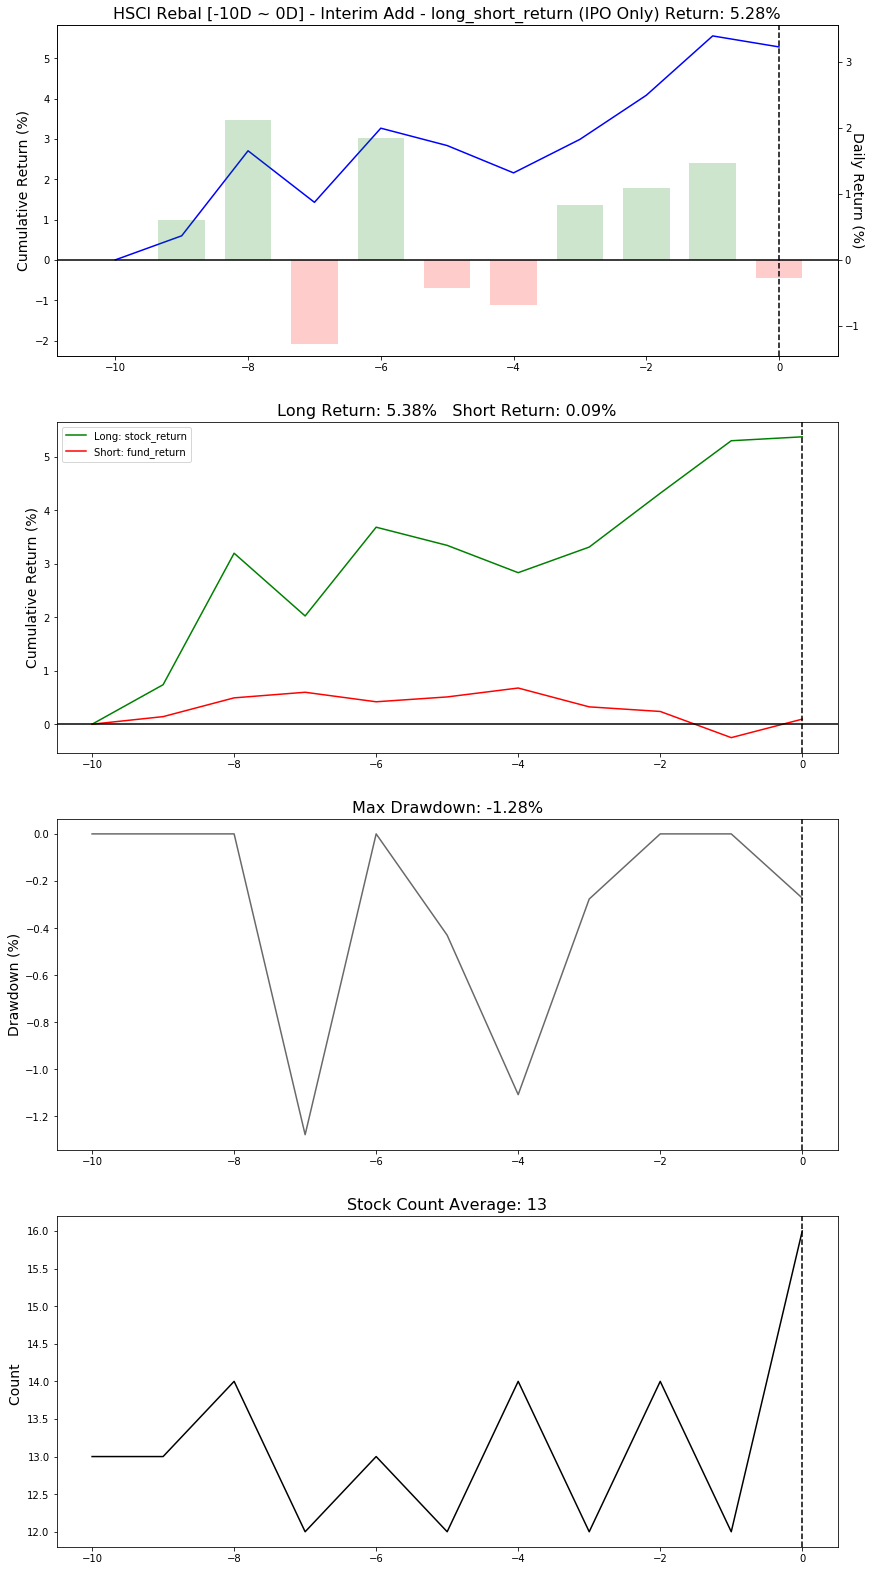

In [27]:
hindsight_interim_add_ipo_chart = pv.get_aggregate_performance_chart(hindsight_interim_add_ipo_backtest_df, 
                                                                 trade_df, review_type="Interim", change="Add", 
                                                                 ipo_only=True)

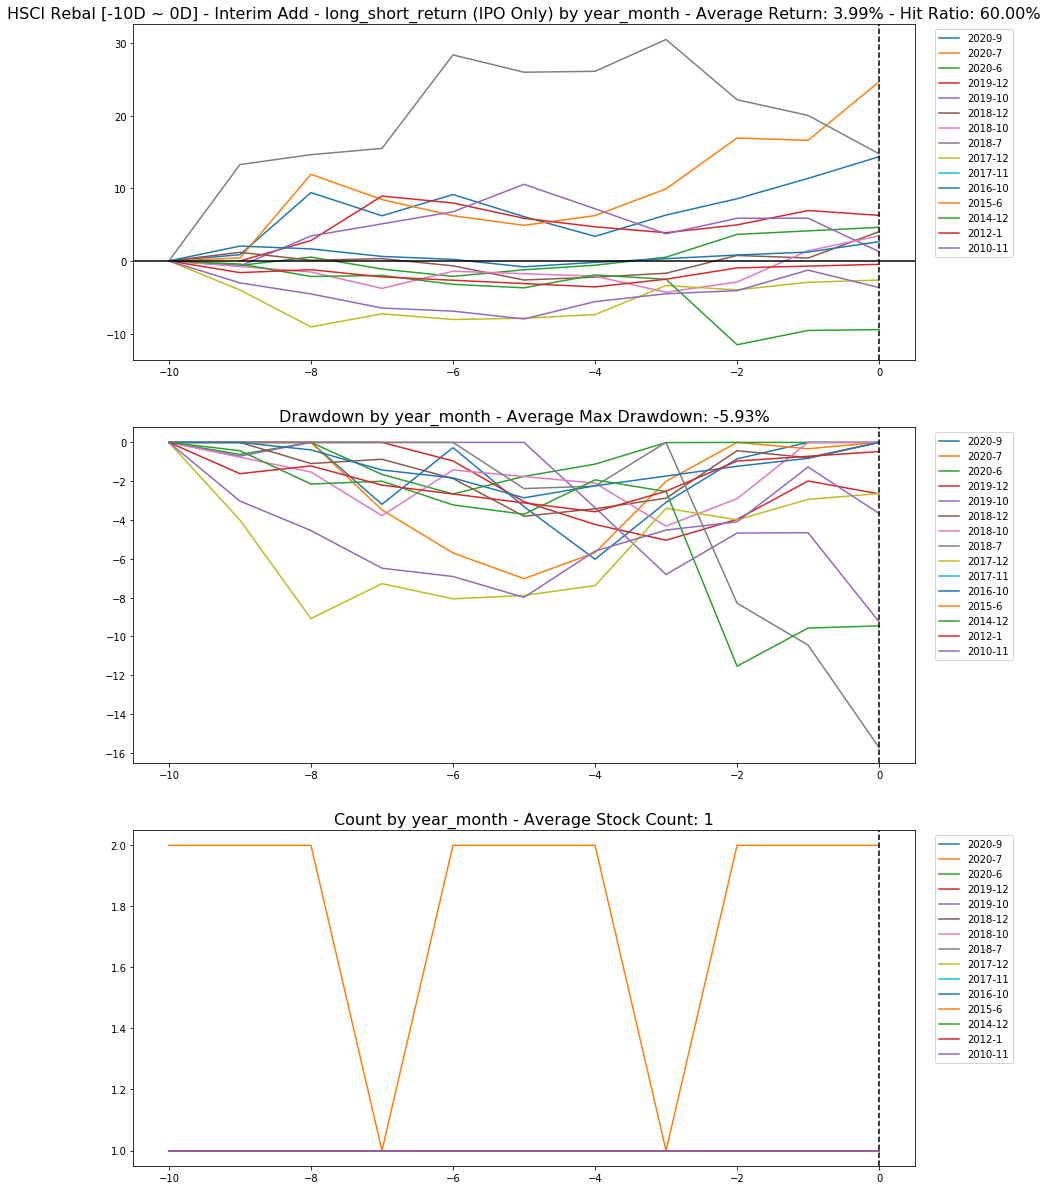

In [28]:
hindsight_interim_add_ipo_chart_year_month = pv.get_group_performance_chart(hindsight_interim_add_ipo_backtest_df, 
                                                                        trade_df, 
                                                                        review_type="Interim", change="Add", 
                                                                        group_by="year_month", ipo_only=True)

In [29]:
hindsight_interim_add_ipo_trade_summary = pv.get_trade_summary(hindsight_interim_add_ipo_backtest_df, trade_df)

In [30]:
hindsight_interim_add_ipo_trade_summary.T.rename(columns={0: "All Trade"})

All Trade
mean_return                   5.28
mean_trade_max_drawdown      -6.18
mean_sharpe_ratio             6.26
mean_win_loss_ratio           4.73
hit_ratio                    56.25
median_return                 1.97
median_max_drawdown          -4.68
median_sharpe_ratio           1.75
median_win_loss_ratio         9.79
trade_count                  16.00

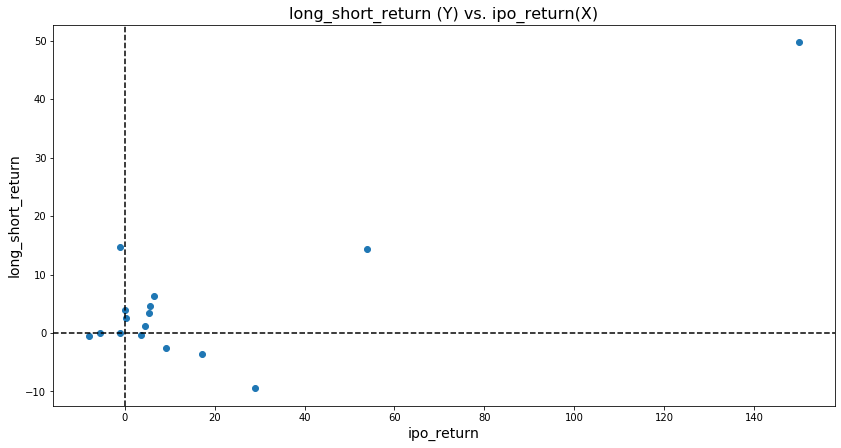

In [31]:
hingsight_ipo_return_chart = pv.get_return_scatter_plot(hindsight_interim_add_ipo_backtest_df, trade_df, 
                                                        item="ipo_return")


### Interim Deletion

Interim Deletion is hard to predict. A certain part of the deletions is due to Privatization which caused the upward return to the date before effective date. <br>

Most of the stocks are delisted before effective date or even announcement date. <br>

The huge drawdown after effective date are actually coming from a few stocks which are not delisted after effective date.

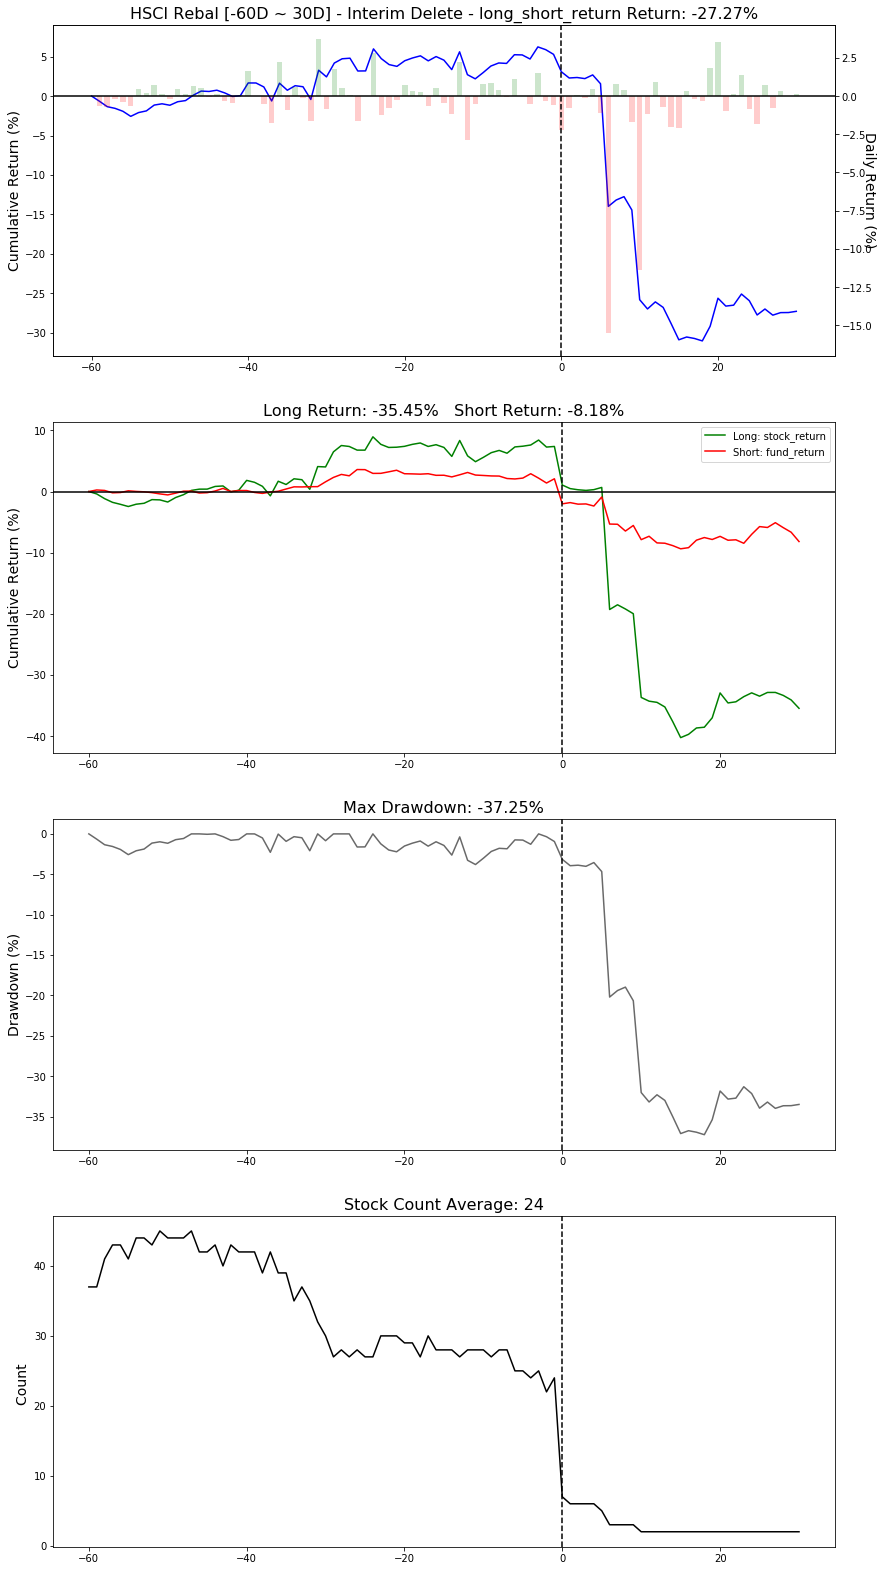

In [32]:
interim_delete_chart = pv.get_aggregate_performance_chart(backtest_df, trade_df, 
                                                          review_type="Interim", change="Delete")
